<a href="https://colab.research.google.com/github/asandy1023/Machine-learning-with-pytorch/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# data_processing


In [ ]:
# Make a world population map based on countries
import sys
!{sys.executable} -m pip install pygal
!{sys.executable} -m pip install pygal_maps_world
import json
from pygal_maps_world.i18n import COUNTRIES
from pygal_maps_world.maps import World

def getCountryCode(countryName):
    '''Enter country name'''
    for dictCode, dictName in COUNTRIES.items():  # Search country code
        if dictName == countryName:
            return dictCode # Return if found
    return None # Return None if not found

# data source. https://github.com/samayo/country-json/blob/master/src/country-by-population.json
fn = 'simple_data_resource/populations.json'
with open(fn) as fnObj:
    getDatas = json.load(fnObj) # read population data json

dictData = {} # dictData["countryName"] = "population"
for getData in getDatas:
    countryName = getData['country']  # Country Name
    countryCode = getCountryCode(getData['country'])
    population = int(float(getData['population']))  # Population       
    if countryCode != None:
        dictData[countryCode] = population  # set dictData

dict1, dict2 = {}, {} # Dictionary defining population grading
for code, population in dictData.items():
    if population > 100000000:
        dict1[code] = population  # Over 100 million
    else:
        dict2[code] = population  # Under 100 million

worldMap = World()
worldMap.title = "World Population in 2020"
worldMap.add('Over 100 million', dict1)
worldMap.add('Under 100 million', dict2)
worldMap.render_to_file('World_Population_in_2020.svg') # save map file


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


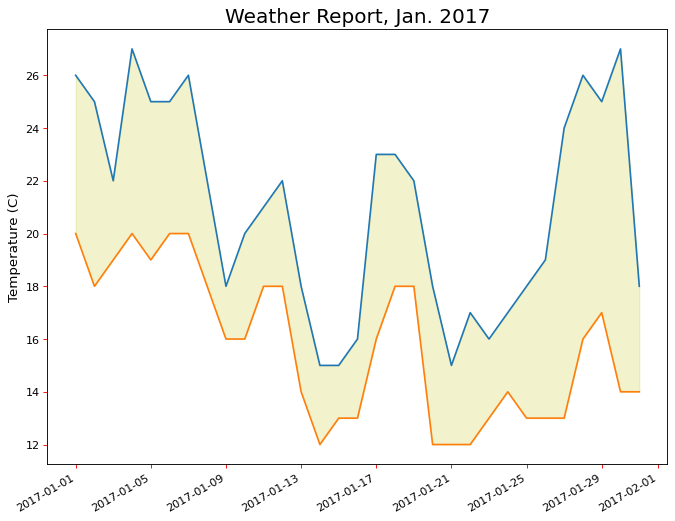

In [ ]:
# read csv plot maximum/minimum temperature
import csv
import matplotlib.pyplot as plt
from datetime import datetime

fn = 'simple_data_resource/TaipeiWeatherJan.csv'
with open(fn) as csvFile:
    csvReader = csv.reader(csvFile)
    headerRow = next(csvReader) # read the next line of the file
    dates, highTemps, lowTemps = [], [], [] # set empty list
    for row in csvReader:
        try:                    
            currentDate = datetime.strptime(row[0], "%Y/%m/%d")
            highTemp = int(row[1])  # set maximum temperature
            lowTemp = int(row[3]) # set minimum temperature
        except Exception:
            print('missing value')
        else: # append
            highTemps.append(highTemp)
            
            lowTemps.append(lowTemp)
            
            dates.append(currentDate)
            
       
fig = plt.figure(dpi=80, figsize=(10, 8))
# Set the drawing area
plt.plot(dates, highTemps)
# plot maximum temperature
plt.plot(dates, lowTemps)
# plot minimum temperature
plt.fill_between(dates, highTemps, lowTemps, color='y', alpha=0.2)
# fill the interval with yellow
fig.autofmt_xdate()
# date flip
plt.title("Weather Report, Jan. 2017", fontsize=18)
plt.xlabel("", fontsize=12)
plt.ylabel("Temperature (C)", fontsize=12)
plt.tick_params(axis='both', labelsize=10, color='red')
plt.show()




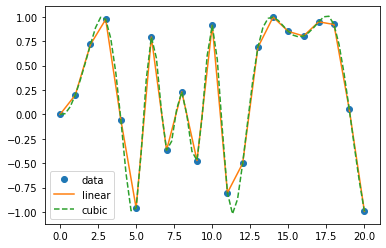

In [ ]:
# scipy.interpolate.interp1d
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = np.linspace(0,20,21)
y = np.sin(x**2/5.0)

fLinear = interp1d(x,y)
# Linear Interpolation function
fCubic = interp1d(x,y,kind='cubic')
# Cubic Interpolation function
xnew = np.linspace(0,20,61)
# Augmented x-axis data

plt.plot(x,y,'o',label='data')  # data
plt.plot(xnew,fLinear(xnew),'-',label='linear') # Linear
plt.plot(xnew,fCubic(xnew),'--',label='cubic')  # Cubic
plt.legend(loc='best')
plt.show()

In [ ]:
# pandas.Series
import pandas as pd
years = range(2020, 2023)
taipei = pd.Series([20, 21, 19], index = years)
hongkong = pd.Series([25, 26, 27], index = years)
singapore = pd.Series([30, 29, 31], index = years)
citydf = pd.concat([taipei, hongkong, singapore])  # preset axis=0
print(type(citydf))
print(citydf)

<class 'pandas.core.series.Series'>
2020    20
2021    21
2022    19
2020    25
2021    26
2022    27
2020    30
2021    29
2022    31
dtype: int64


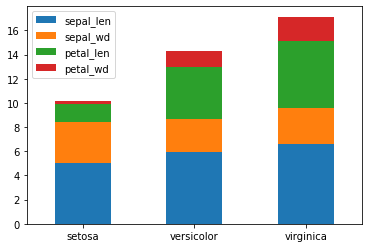

In [ ]:
# plt iris histogram
import pandas as pd
import matplotlib.pyplot as plt

colName = ['sepal_len','sepal_wd','petal_len','petal_wd','species']
iris = pd.read_csv('simple_data_resource/iris.csv', names = colName)
iris['species'] = iris['species'].apply(lambda x: x.replace("Iris-",""))
# Statistical mean of iris "group"
iris_mean = iris.groupby('species', as_index=False).mean()
# Plot a stacked bar chart
iris_mean.plot(kind='bar',stacked=True)
# Scale processing
plt.xticks(iris_mean.index,iris_mean['species'], rotation=0)

plt.show()

# acquisition of big data

In [ ]:
# Get vacancies on the job application website
import requests
import bs4

url = 'https://www.104.com.tw/jobs/search/?ro=0&keyword=Python&jobsource=2022indexpoc'
htmlFile = requests.get(url)
objSoup = bs4.BeautifulSoup(htmlFile.text, 'lxml')
jobs = objSoup.find_all('article', class_='js-job-item')
for job in jobs:
    print("公司名稱 : ", job.get('data-cust-name'))
    print("職務名稱 : ", job.get('data-job-name'))

公司名稱 :  科爾迪股份有限公司
職務名稱 :  PHP Laravel工程師(需日語)
公司名稱 :  頎邦科技股份有限公司
職務名稱 :  【超夯主打-Ⅱ‧  AI專區】-大數據工程師/全端軟體開發工程師-湖口區光復廠 ◎自投履歷抽linepoint點數 ◎
公司名稱 :  石敢當科技股份有限公司
職務名稱 :  資深伺服器工程師(台中)
公司名稱 :  信義房屋股份有限公司
職務名稱 :  【PropTech數位人才招募】資深雲端數據工程師
公司名稱 :  霖園關係企業_神坊資訊股份有限公司
職務名稱 :  [營運中心] Java 後端工程師 (Java backend Engineer)
公司名稱 :  石敢當科技股份有限公司
職務名稱 :  伺服器工程師 (台中)
公司名稱 :  Gogoro Taiwan Limited_睿能創意股份有限公司
職務名稱 :  Financial Planning and Analysis Manager
公司名稱 :  BigGo_樂方股份有限公司
職務名稱 :  Python Data Scientist
公司名稱 :  創御軟體有限公司
職務名稱 :  Python Developer | Python工程師
公司名稱 :  有創科技股份有限公司
職務名稱 :  python工程師
公司名稱 :  碁曄科技股份有限公司
職務名稱 :  python後端工程師
公司名稱 :  滙訊科技有限公司
職務名稱 :  Python工程師
公司名稱 :  BigGo_樂方股份有限公司
職務名稱 :  Python工程師
公司名稱 :  得意節能科技股份有限公司
職務名稱 :  Python開發工程師
公司名稱 :  皇霖實業股份有限公司
職務名稱 :  Python工程師
公司名稱 :  台灣競遊智慧網路股份有限公司
職務名稱 :  Python 初階資料科學工程師
公司名稱 :  智聯服務股份有限公司
職務名稱 :  Python 程式設計師 (新竹)
公司名稱 :  益網科技股份有限公司
職務名稱 :  Python工程師
公司名稱 :  杰倫智能科技股份有限公司
職務名稱 :  Python 後端工程師
公司名稱 :  岳鼎股份有限公司
職務名稱 :  Python 工程師
公司名稱 :  雙子數位科技有限公司
職務名稱

### Sliced datasets and cross-validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
X_train,X_test=train_test_split(X,test_size=0.3,random_state=10)

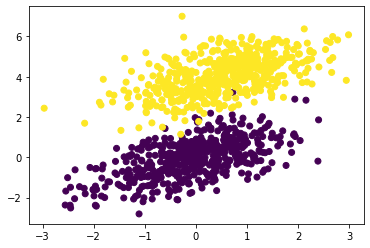

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline


np.random.seed(4)
num_pos = 500
 
subset1 = np.random.multivariate_normal([0, 0], [[1, 0.6],[0.6, 1]], num_pos)
subset2 = np.random.multivariate_normal([0.5, 4], [[1, 0.6],[0.6, 1]], num_pos)
 
X = np.vstack((subset1, subset2))
y = np.hstack((np.zeros(num_pos), np.ones(num_pos)))
 
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw

Epoch [1/5], Step [100/600], Loss: 0.2279
Epoch [1/5], Step [200/600], Loss: 0.1250
Epoch [1/5], Step [300/600], Loss: 0.1021
Epoch [1/5], Step [400/600], Loss: 0.0216
Epoch [1/5], Step [500/600], Loss: 0.0439
Epoch [1/5], Step [600/600], Loss: 0.0613
Epoch [2/5], Step [100/600], Loss: 0.0904
Epoch [2/5], Step [200/600], Loss: 0.0474
Epoch [2/5], Step [300/600], Loss: 0.0524
Epoch [2/5], Step [400/600], Loss: 0.0220
Epoch [2/5], Step [500/600], Loss: 0.0242
Epoch [2/5], Step [600/600], Loss: 0.0270
Epoch [3/5], Step [100/600], Loss: 0.0200
Epoch [3/5], Step [200/600], Loss: 0.0189
Epoch [3/5], Step [300/600], Loss: 0.0470
Epoch [3/5], Step [400/600], Loss: 0.0433
Epoch [3/5], Step [500/600], Loss: 0.0077
Epoch [3/5], Step [600/600], Loss: 0.0088
Epoch [4/5], Step [100/600], Loss: 0.0121
Epoch [4/5], Step [200/600], Loss: 0.0077
Epoch [4/5], Step [300/600], Loss: 0.0146
Epoch [4/5], Step [400/600], Loss: 